**YOLO v8n Mask Detection Using Custom Dataset**

Below command installs the kaggle Python package, which provides a command-line interface (CLI) to interact with the Kaggle platform. Kaggle is a popular platform for data science competitions, datasets, and educational resources. By installing the kaggle package, you can:

Download datasets and competitions directly from Kaggle to your local or cloud environment.
Submit competition entries from the command line.
Manage your Kaggle profile and other resources programmatically.
Comments:
*   !: Indicates a shell command in Jupyter Notebook or Google Colab. This allows execution of terminal commands within the notebook.
*   pip install: Installs the specified Python package from PyPI (Python Package Index).
*   -q: Suppresses the output of the installation process to make it less verbose ("quiet mode").

In [ ]:
!pip install -q kaggle

Below code is used to mount your Google Drive to your Google Colab environment. By doing so, you can access files stored in your Google Drive directly from Colab, making it easier to use datasets, save models, or share files between your local system and Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.cElementTree as ET
import glob
import os
import json
import random
import shutil
from PIL import Image, ImageOps

In [ ]:
# Define the path to check
path = "/content/drive/MyDrive/YOLO"

# Check if the path exists and is a directory
if os.path.exists(path) and os.path.isdir(path):
    print("There is a folder!")  # Folder already exists
else:
    os.mkdir(path)  # Create the folder if it does not exist
    print("Folder created!")  # Notify that the folder was created

# This command changes the current working directory in your Colab environment to the specified directory located in your Google Drive. In this case, the directory is YOLO
%cd /content/drive/MyDrive/YOLO

There is a folder!
/content/drive/MyDrive/YOLO


Below code is used to write a YAML file. This YAML text is a part of the dataset configuration file required by YOLO-based frameworks, such as YOLOv5 or YOLOv8.
It allows the model to locate the dataset and understand the number of classes and their corresponding names.

In [ ]:
%cd /content/drive/MyDrive/YOLO/data

yaml_text = """
train: /content/drive/MyDrive/YOLO/data/train/images
val: /content/drive/MyDrive/YOLO/data/valid/images

nc: 25
names: ['Amblypsylopus sp', 'Apis sp', 'Carpelimus sp', 'Cofana spectra', 'Elaphropus sp', 'Formicidae sp -tidak terlihat dari samping-', 'Hydrophilus piceus', 'Iridomyrmex sp', 'Metoeca foedalis', 'Micronecta sp', 'Monocrepidius sp', 'Nala sp', 'Neoporus sp', 'Nylanderiasp', 'Oncocephalus sp', 'Ophionea nigrifasciata', 'Ostrinia sp atau Crocidophora sp', 'Paederus fuscipes', 'Pilonthus sp', 'Psychoda sp', 'Pyralidae -kalau kecil-', 'Sepedon sphegea', 'Tachys sp', 'Termitidae', 'Tipula sayi']
"""

with open("/content/drive/MyDrive/YOLO/data/data.yaml", 'w') as file:
    file.write(yaml_text)

/content/drive/MyDrive/YOLO/data


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.0/112.6 GB disk)


In [ ]:
# Define the path to check
path = "/content/drive/MyDrive/YOLO/result/"

# Check if the path exists and is a directory
if os.path.exists(path) and os.path.isdir(path):
    print("There is a folder!")  # Folder already exists
else:
    os.mkdir(path)  # Create the folder if it does not exist
    print("Folder created!")  # Notify that the folder was created

%cd /content/drive/MyDrive/YOLO/result/

There is a folder!
/content/drive/MyDrive/YOLO/result


In [ ]:
!yolo train model=yolov8n.pt data=/content/drive/MyDrive/YOLO/data/data.yaml epochs=1000 imgsz=640

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/YOLO/data/data.yaml, epochs=1000, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

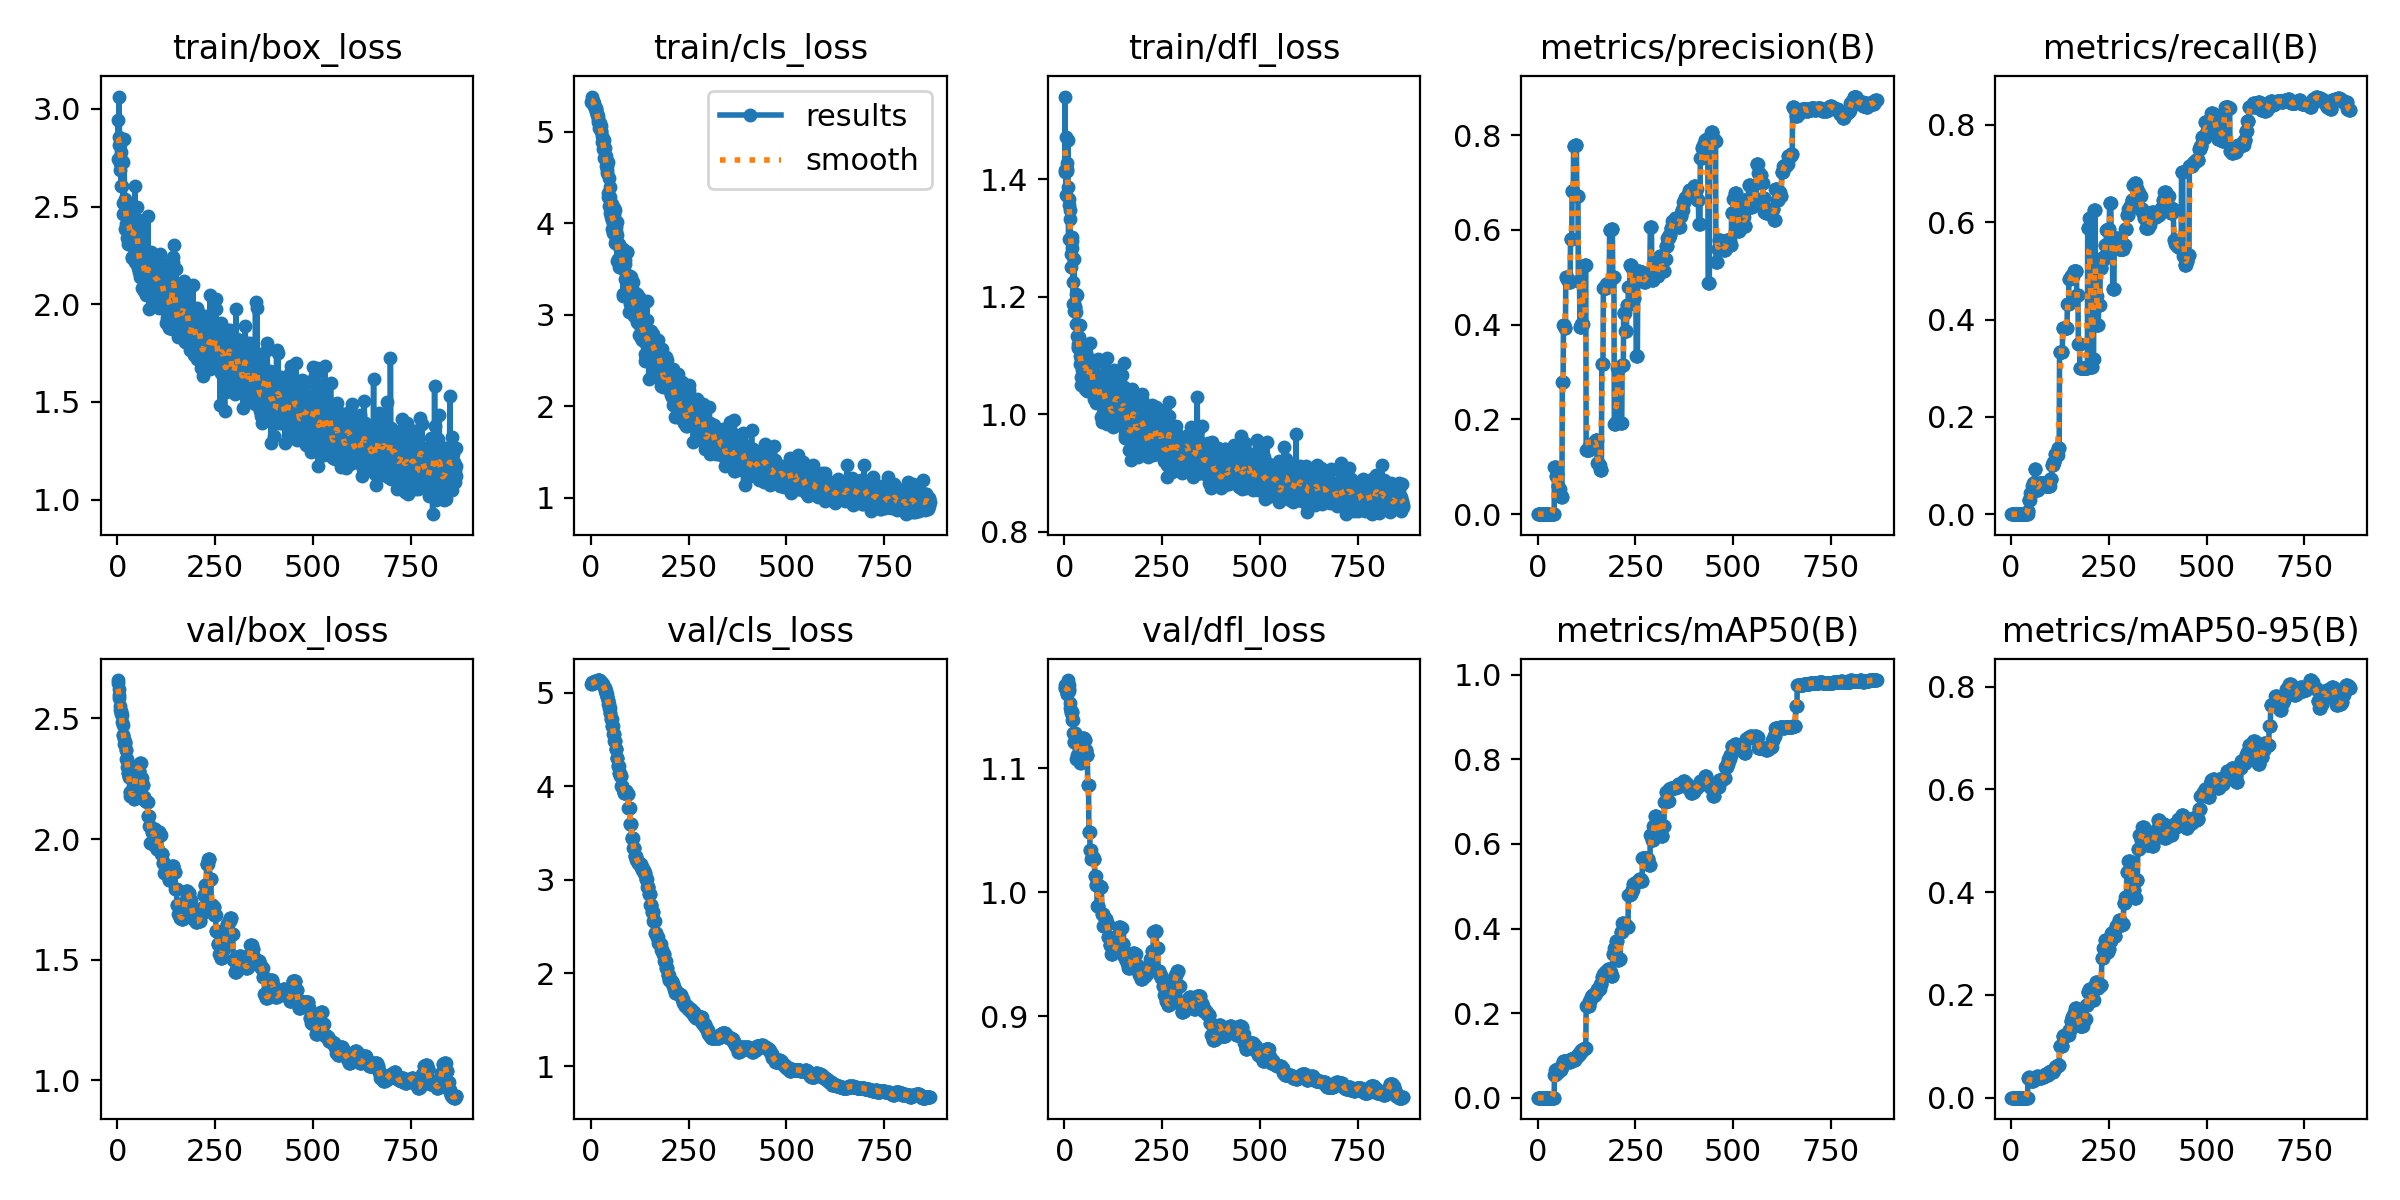

In [ ]:
Image.open("/content/drive/MyDrive/YOLO/result/runs/detect/train7/results.png")

In [ ]:
!yolo predict model=/content/drive/MyDrive/YOLO/result/runs/detect/train7/weights/best.pt source='/content/drive/MyDrive/YOLO/data/valid/images'

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,010,523 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/YOLO/data/valid/images/F_jpeg.rf.f9438472d6b3192c05156a53ebe2d3bc.jpg: 640x640 1 Apis sp, 14 Cofana spectras, 11 Hydrophilus piceuss, 1 Metoeca foedalis, 26 Micronecta sps, 1 Neoporus sp, 1 Nylanderiasp, 2 Paederus fuscipess, 2 Psychoda sps, 15.0ms
Speed: 3.7ms preprocess, 15.0ms inference, 172.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


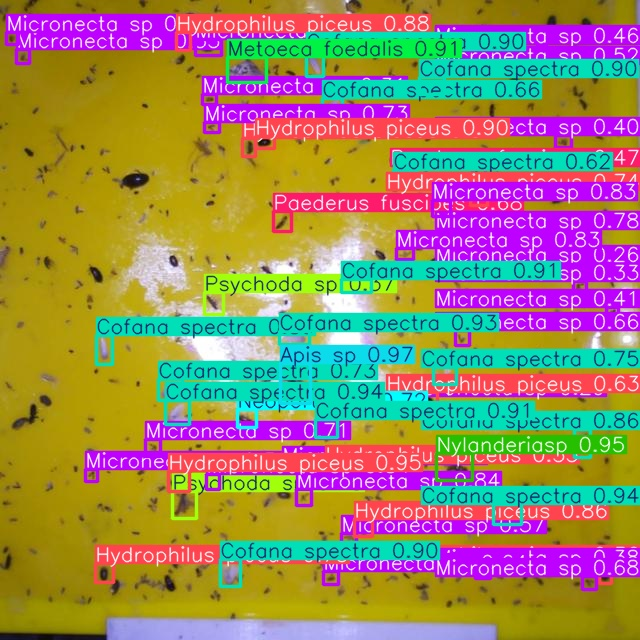

In [ ]:
Image.open('/content/drive/MyDrive/YOLO/result/runs/detect/predict/F_jpeg.rf.f9438472d6b3192c05156a53ebe2d3bc.jpg')